In [ ]:
pip install ktrain

     |████████████████████████████████| 25.3MB 130kB/s 
     |████████████████████████████████| 6.8MB 43.7MB/s 
     |████████████████████████████████| 983kB 51.8MB/s 
     |████████████████████████████████| 266kB 52.2MB/s 
     |████████████████████████████████| 1.9MB 46.0MB/s 
     |████████████████████████████████| 1.2MB 48.8MB/s 
     |████████████████████████████████| 471kB 50.2MB/s 
     |████████████████████████████████| 901kB 47.7MB/s 
     |████████████████████████████████| 3.3MB 51.6MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=2d40699be7c9628ed562cc721f4a21d189b3ffcf3d94b14edb1c1629de3daaca
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=98b02d8104b6561cd7a4dc03cf883af62a433e71f11143760b62c26c18eb11c5
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
import ktrain
from ktrain import text
from sklearn.datasets import fetch_20newsgroups

In [ ]:
categoris = ['sci.med','sci.space','soc.religion.christian','talk.politics.guns','talk.politics.mideast','talk.politics.misc','talk.religion.misc']

In [ ]:
train = fetch_20newsgroups(
    subset='train',
    categories = categoris,
    shuffle = True
)

In [ ]:
test = fetch_20newsgroups(
    subset='test',
    categories=categoris,
    shuffle = True
)

In [ ]:
test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
test.target_names

['sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
test.target

array([1, 2, 5, ..., 0, 6, 6])

In [ ]:
X_train = train.data
Y_train = train.target

X_test = test.data
Y_test = test.target

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3738,)
(2489,)
(3738,)
(2489,)


In [ ]:
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name=model_name,maxlen=512, class_names=categoris)

In [ ]:
train_data = trans.preprocess_train(X_train,Y_train)
test_data = trans.preprocess_test(X_test,Y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 375
	95percentile : 1115
	99percentile : 2593


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 370
	95percentile : 1056
	99percentile : 2621


In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model,train_data=train_data,val_data=test_data,batch_size=16)

simulating training for different learning rates... this may take a few moments...
Epoch 1/4
233/233 [==============================] - 216s 883ms/step - loss: 1.9363 - accuracy: 0.1804
Epoch 2/4
233/233 [==============================] - 215s 925ms/step - loss: 0.8497 - accuracy: 0.7996
Epoch 3/4
233/233 [==============================] - 212s 911ms/step - loss: 2.0295 - accuracy: 0.1484
Epoch 4/4
233/233 [==============================] - 32s 134ms/step - loss: 42.2039 - accuracy: 0.1481


done.
Visually inspect loss plot and select learning rate associated with falling loss


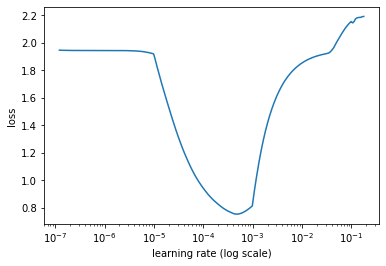

In [ ]:
# finding the best learning rate
learner.lr_find(show_plot=True,max_epochs=4)

In [ ]:
learner.fit_onecycle(1e-4,1)



begin training using onecycle policy with max lr of 0.0001...
234/234 [==============================] - 267s 1s/step - loss: 1.2066 - accuracy: 0.6212 - val_loss: 0.5678 - val_accuracy: 0.8128


In [ ]:
learner.validate(class_names=categoris)

                        precision    recall  f1-score   support

               sci.med       0.97      0.94      0.96       396
             sci.space       0.92      0.93      0.92       394
soc.religion.christian       0.71      0.92      0.80       398
    talk.politics.guns       0.68      0.86      0.76       364
 talk.politics.mideast       0.96      0.95      0.95       376
    talk.politics.misc       0.81      0.56      0.66       310
    talk.religion.misc       0.50      0.28      0.36       251

              accuracy                           0.81      2489
             macro avg       0.79      0.78      0.78      2489
          weighted avg       0.81      0.81      0.80      2489



array([[373,   3,  11,   1,   2,   4,   2],
       [  5, 368,   0,   4,   4,  10,   3],
       [  0,   0, 365,   0,   0,   1,  32],
       [  0,   4,   1, 314,   4,  22,  19],
       [  0,   2,   3,   7, 357,   2,   5],
       [  1,  14,   2, 105,   4, 175,   9],
       [  4,  11, 129,  31,   2,   3,  71]])

In [ ]:
learner.view_top_losses(n=5,preproc=trans)

----------
id:981 | loss:5.95 | true:talk.politics.misc | pred:sci.space)

----------
id:1143 | loss:5.89 | true:talk.politics.misc | pred:sci.space)

----------
id:613 | loss:5.72 | true:sci.med | pred:soc.religion.christian)

----------
id:652 | loss:5.6 | true:talk.politics.mideast | pred:soc.religion.christian)

----------
id:257 | loss:5.58 | true:sci.med | pred:soc.religion.christian)



In [ ]:
print(X_test[257])

From: grante@aquarius.rosemount.com (Grant Edwards)
Subject: Re: Krillean Photography
Nntp-Posting-Host: aquarius
Reply-To: grante@aquarius.rosemount.com (Grant Edwards)
Organization: Rosemount, Inc.
Lines: 15

ttrusk@its.mcw.edu (Thomas Trusk) writes:
: 
: BUT, to say you're an atheist is to suggest you have PROOF there is NO GOD.
: To be a politically-correct skeptic, better to go with agnostic, like me! :)
:

As a self-proclaimed atheist my position is that I _believe_ that there is
no god.  I don't claim to have any proof.  I interpret the agnostic position 
as having no beliefs about god's existence.

--
Grant Edwards                                 |Yow!  Are we THERE yet?  My
Rosemount Inc.                                |MIND is a SUBMARINE!!
                                              |
grante@aquarius.rosemount.com                 |



In [ ]:
# Predict on new data
predictor = ktrain.get_predictor(learner.model,preproc=trans)

In [ ]:
txt = 'i love how neural networks resembles our brain'

In [ ]:
predictor.predict(txt)

'sci.med'

In [ ]:
predictor.save('distillbert-model.h5')